In [7]:
import kaggle 

!kaggle datasets download johnsmith88/heart-disease-dataset -f heart.csv

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown




  0%|          | 0.00/37.2k [00:00<?, ?B/s]
100%|██████████| 37.2k/37.2k [00:00<00:00, 134kB/s]
100%|██████████| 37.2k/37.2k [00:00<00:00, 133kB/s]


Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
heart.csv: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import pandas as pd 

df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
from sklearn.model_selection import train_test_split

X,y = df.drop('target',axis=1),df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=9)

### Scale Insensitive

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest  = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
from sklearn.naive_bayes import GaussianNB

nb_clf  = GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf  = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier()

### Scale Sensitive 

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [29]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled,y_train)

LogisticRegression()

In [30]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [18]:
forest.score(X_test,y_test)

0.9853658536585366

In [19]:
gb_clf.score(X_test,y_test)

0.9707317073170731

In [20]:
nb_clf.score(X_test,y_test)

0.8463414634146341

In [ ]:
knn.score(X_test_scaled,y_test)

In [ ]:
log.score(X_test_scaled,y_test)

In [ ]:
svc.score(X_test_scaled,y_test)

In [33]:
from sklearn.metrics import recall_score

y_pred = forest.predict(X_test)
print("forest",recall_score(y_test,y_pred))

forest 0.9859154929577465


In [34]:
y_pred = nb_clf.predict(X_test)
print("nb_clf",recall_score(y_test,y_pred))

nb_clf 0.9014084507042254


In [35]:
y_pred = gb_clf.predict(X_test)
print("gb_clf",recall_score(y_test,y_pred))

gb_clf 0.9859154929577465


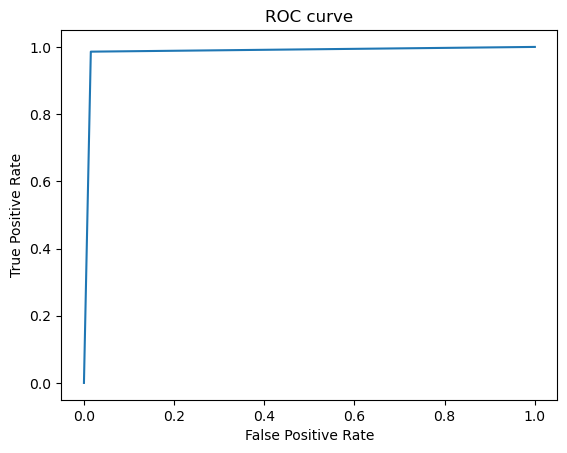

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

y_pred = forest.predict(X_test)
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')   
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [39]:
import seaborn as sns 

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

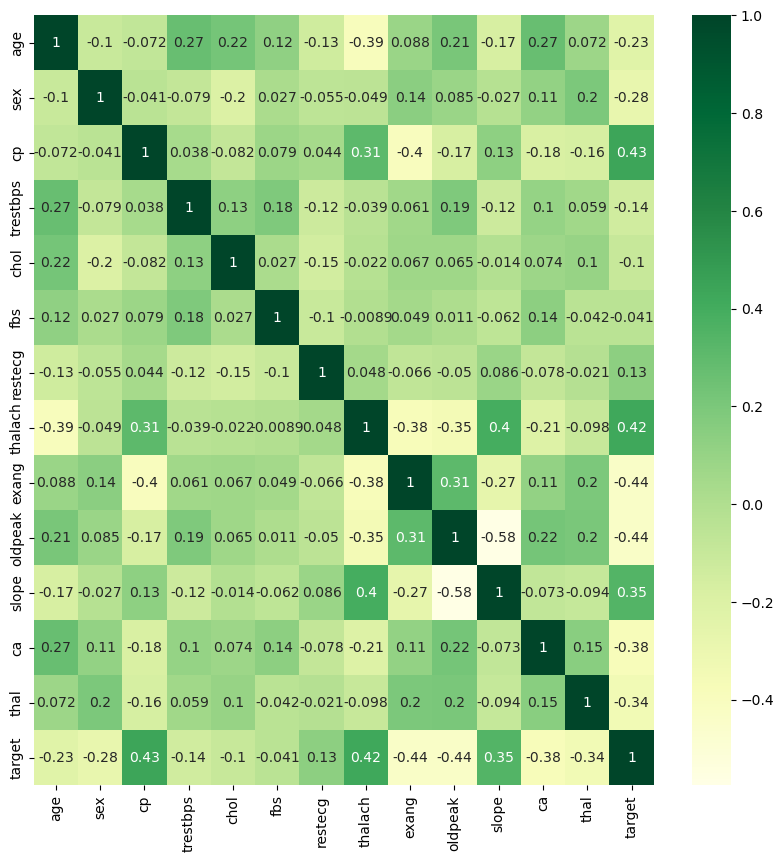

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGn')

In [ ]:
# Random Forest Classifier performs the best